# Costos de casas en USA

En el presente notebook se realizará un análisis completo de un dataset sobre los costos de casas en USA. Se aplicarán los pasos más prácticos como lo son el preprocesamiento, EDA (Exploratory Data Analysis) y la aplicación de un algoritmo de predicción teniendo en cuenta el costo (en USD) como variable objetiva. También, el análisis se hará con base en la metodología "SEMMA", teniendo las fases: muestreo, exploración, modificación, modelado y evaluación. 

## Muestreo

El objetivo de realizar éste análisis es poder realizar la predicción de los precios de casas a través de un modelo, teniendo como variable objetiva el precio y por supuesto teniendo en cuenta las demás variables, tales como, número de baños, cuartos, pisos, año de construcción y renovación, la diferencia entre estos, al área de la sala, del solar, del sótano y el área encima del sótano. También se harán verificaciones con variables que indica si la casa tiene una buena vista, si está frente al mar y por supuesto la condición general de la casa.

Además, como el dataset tiene una cantidad aceptable de 4140 observaciones en su forma base, se tomará el conjunto entero.

## Exploración 

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset = pd.read_csv('datasets/USA Housing Training Dataset.csv')

dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4136,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4137,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4138,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [3]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [4]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

De lo anterior se pueden destacar los siguientes puntos:

- Los precios están en un rango de 0 a 2659.
- El número de baños varía desde 0 a 7.
- El número de cuartos varía desde 0 a 8.
- El número de pisos varía de 1 a 4. 
- Al menos el 75% de las casas no están ubicadas frente al mar.
- El menos el 75% de las casas fueron construidas en 1997 o antes y fueron renovadas en 1999 o antes.
- No existe valores nulos para ninguno de los identificadores de ninguna observación, por lo que no es necesario realizar una sustitución de valores nulos.
- El rango de la calidad de la vista está dentro del dominio de los números enteros entre 0 y 4.
- El rango de la condición general de la casa está dentro del dominio de los números enteros entre 1 y 5.
- La variable bathrooms permite observaciones con valores reales positivos, hecho que no tiene sentido. Se procederá a realizar un ajuste de esta columna más adelante.  

Luego, teniendo en cuenta con estos datos generales, se pueden construir gráficas con los datos para observar patrones y comportamientos en el conjunto de datos. También, teniendo base en la descripción del dataset, muchos de los datos contribuyen al precio de la propiedad, por ejemplo un mayor número de baños, cuartos, año más antiguo de construcción, año más reciente de renovación, etc. La interrogante es, ¿es esto realmente como se plantea? 

Se plantean las siguientes situaciones: 

- ¿El número de habitaciones realmente influye en el precio?
- ¿El número de baños realmente influye en el precio?
- ¿La ubicación realmente influye en el precio?
- ¿El año de construcción y renovación realmente influyen en el precio?
- ¿El área de la sala realmente influye en el precio?
- ¿El área del solar realmente influye en el precio?
- ¿El área del sótano influye en el precio?
- ¿El área por encima del sótano influye en el precio?
- ¿Si la casa tiene vista al mar aumenta su precio?
- ¿Si la casa tiene una buena vista aumenta su precio?
- ¿La condición de la casa realmente influye en el precio?
- ¿El tiempo de renovación tiene una relación notable con la ubicación y el precio de la casa?

Cabe destacar que todas estas observaciones son útiles debido a que pueden servir como verificación de las predicciones.  

### ¿El número de habitaciones realmente influye en el precio?

Se puede construir una gráfica con base en el promedio del precio por número de habitaciones.

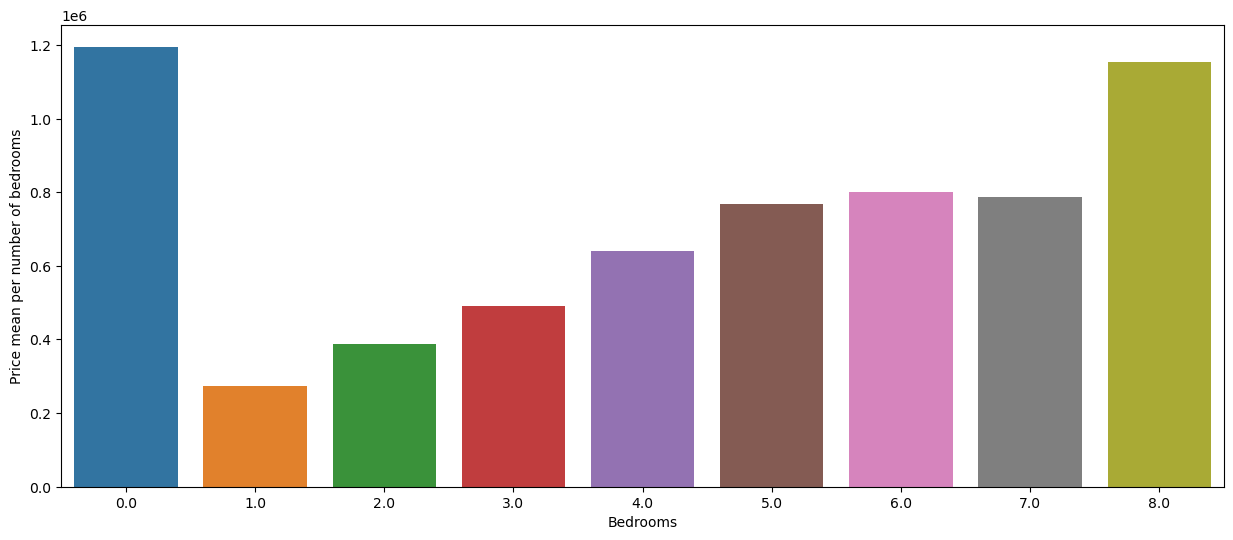

In [5]:
filtered_dataset = dataset[["price", 'bedrooms']]

filtered_dataset = filtered_dataset.groupby('bedrooms').mean().reset_index()

filtered_dataset.columns = ['bedrooms', 'price mean per number of bedrooms']

plt.figure(figsize=(15, 6))

sb.barplot(filtered_dataset, x="bedrooms", y="price mean per number of bedrooms")

plt.xlabel('Bedrooms')

plt.ylabel('Price mean per number of bedrooms')

plt.show()

Si bien es cierto que un mayor número de cuartos aporta más valor a la propiedad, se puede decir que las casas que no tienen cuartos rompen esta afirmación

### ¿El número de baños realmente influye en el precio?

En este caso, también se puede construir una gráfica, pero esta vez con base en el promedio del precio por número de baños que tiene la casa.

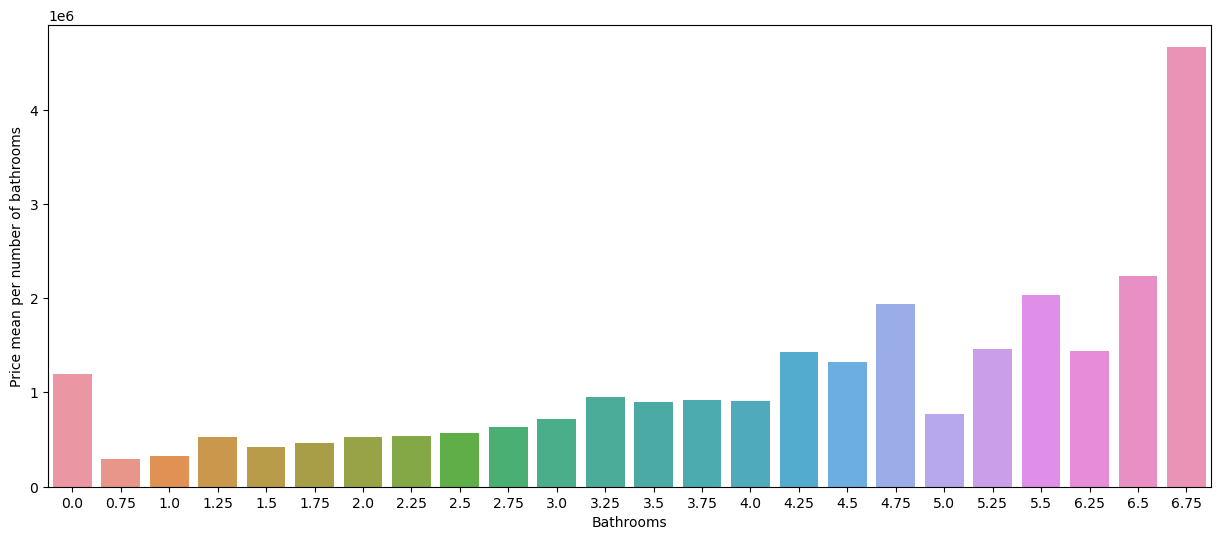

In [6]:
filtered_dataset = dataset[["price", 'bathrooms']]

filtered_dataset = filtered_dataset.groupby('bathrooms').mean().reset_index()

filtered_dataset.columns = ['bathrooms', 'price mean per number of bathrooms']

plt.figure(figsize=(15, 6))

sb.barplot(filtered_dataset, x="bathrooms", y="price mean per number of bathrooms")

plt.xlabel('Bathrooms')

plt.ylabel('Price mean per number of bathrooms')

plt.show()

Aqui podemos ver que existe un problema de dominio debido a que existen casas que tienen un número de baños perteneciente al conjunto de los números reales positivos, hecho que no tiene sentido.

Luego, se observa que no necesariamente un mayor número de baños no implica mayor precio en promedio. A pesar de que si se ve un patrón incremental en ciertos rangos de la gráfica existen casos en los que por ejemplos, las casas con 5 baños tienen un menor precio que casas con 4 baños.

Sin embargo, es importante que se haga un cambio en la columna para aproximar los valores reales a enteros. Esto ser hará con una clásica aproximación.

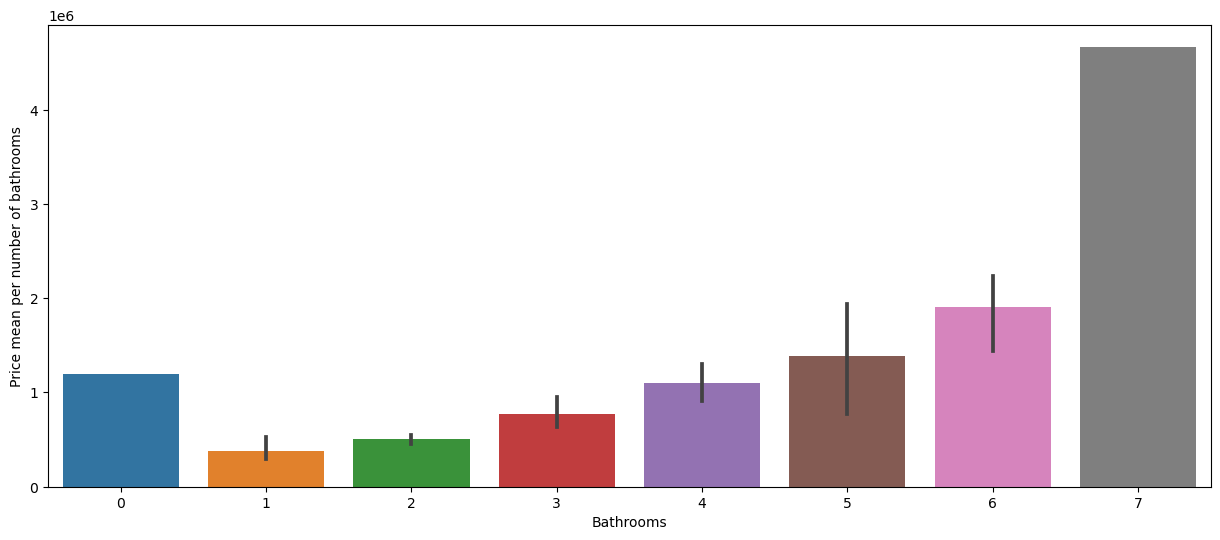

In [7]:
filtered_dataset['bathrooms'] = filtered_dataset['bathrooms'].round().astype(int)

plt.figure(figsize=(15, 6))

sb.barplot(filtered_dataset, x="bathrooms", y="price mean per number of bathrooms")

plt.xlabel('Bathrooms')

plt.ylabel('Price mean per number of bathrooms')

plt.show()

Con esto se concluye que si existe cierta relación en cuanto al aumento del precio y el número de baños, pero el hecho de que existan casas sin baños que tengan un precio mayor a casas que tiene 1, 2, 3 y 4 baños, puede romper con estar relación o al menos hacerla más débil. 

### ¿La ubicación realmente influye en el precio?

Para visualizar los datos como respuesta a esta interrogante se constriurá una gráfica con el promedio de precio por ubicación.

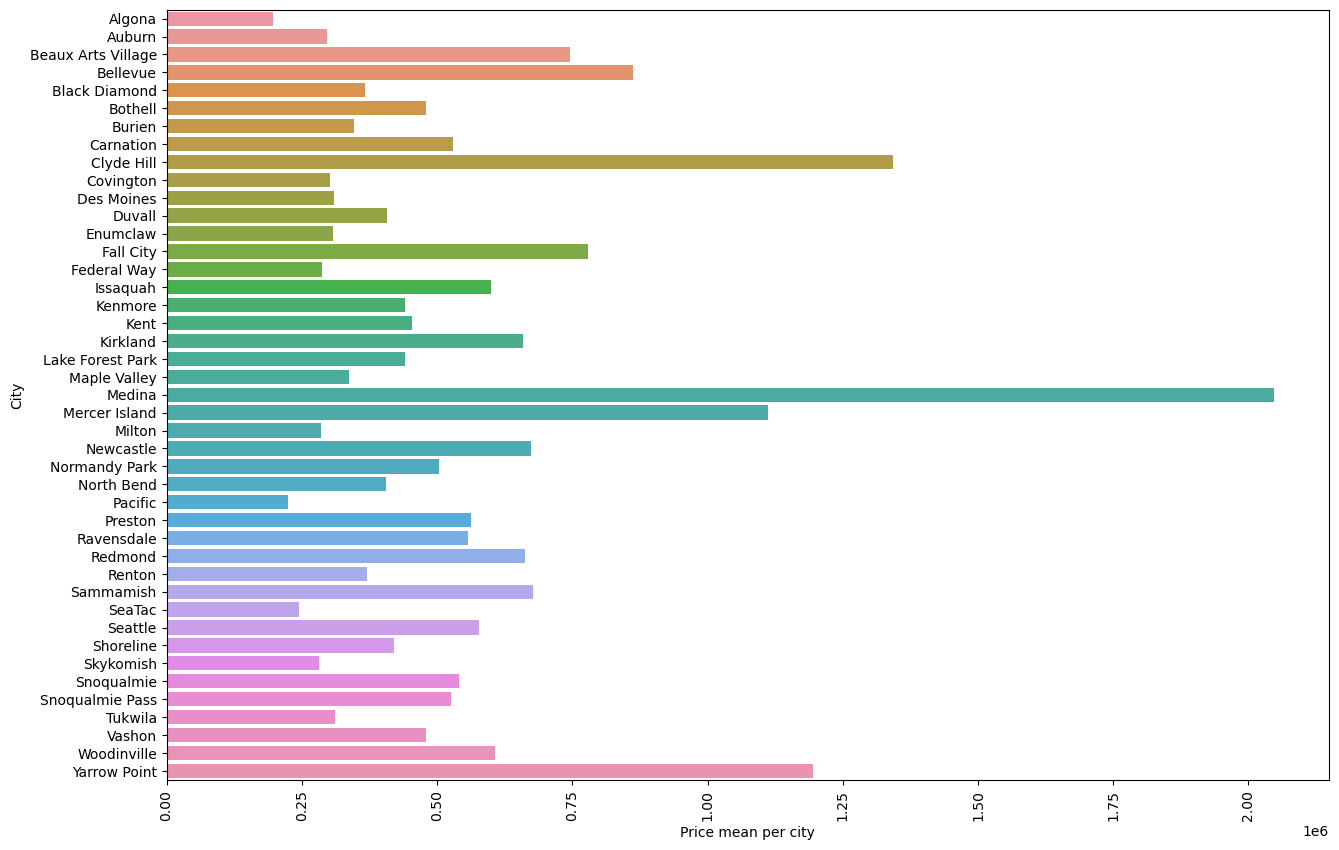

In [8]:
filtered_dataset = dataset[["price", 'city']]

filtered_dataset = filtered_dataset.groupby('city').mean().reset_index()

filtered_dataset.columns = ['city', 'price mean per city']

plt.figure(figsize=(15, 10))

plt.xticks(rotation=90)

sb.barplot(filtered_dataset, x="price mean per city", y="city")

plt.xlabel('Price mean per city')

plt.ylabel('City')

plt.show()

Se observa que efectivamente, la ciudad donde se encuentre la ciudad si influye en el precio promedio de las casas debido a que existe bastante diferencia en el precio promedio por ciudad.

### ¿El año de construcción y renovación realmente influyen en el precio?

Para esta interrogante, se crearán dos gráficas estilo histograma que permita ver el promedio del precio por año de construcción y renovación. 

/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


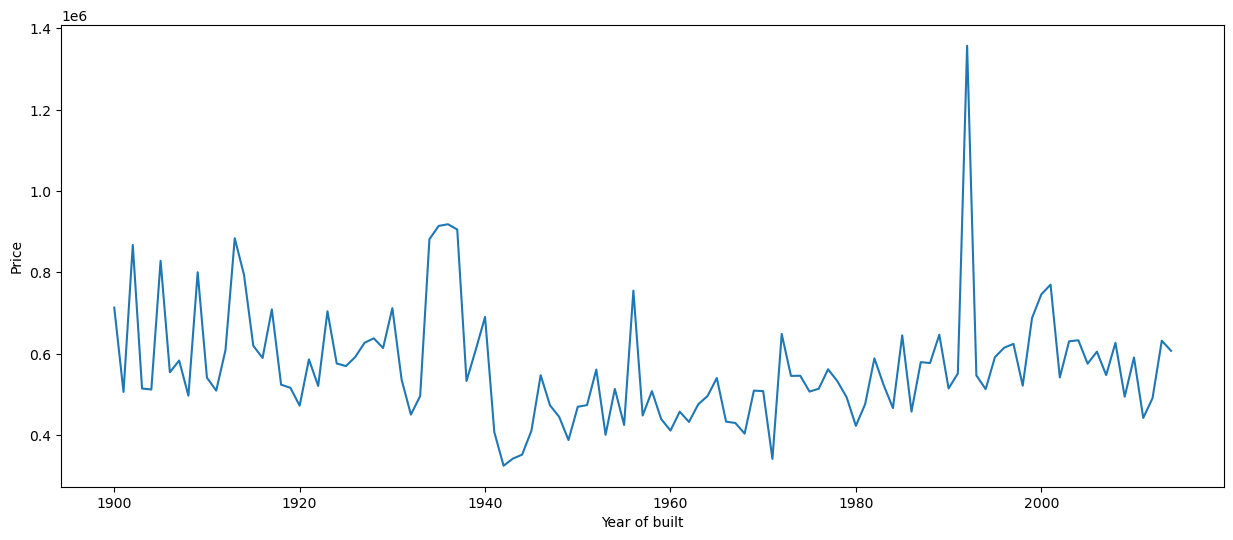

In [9]:
filtered_dataset = dataset[["price", 'yr_built']]

filtered_dataset = filtered_dataset.groupby('yr_built').mean().reset_index()

filtered_dataset.columns = ['yr_built', 'price']

plt.figure(figsize=(15, 6))

sb.lineplot(filtered_dataset, x="yr_built", y="price")

plt.xlabel("Year of built")

plt.ylabel('Price')

plt.show()

En la gráfica se puede apreciar que si existe cierta tendencia que dice a que las casas más antiguas sean más caras que las más reciente, colocando como parámetro que una casa se considera antigua si su año de construcción es menor a 1950 (aproximadamente el año medio).

También se puede considerar otro parámetro distinto al año 1950, por ejemplo, el año 2000. Para comprobar esto, se realizarán dos gráficas.

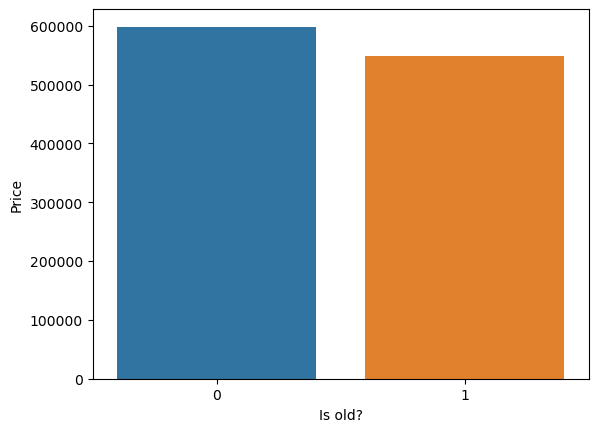

In [10]:
filtered_dataset['is_old'] = 1 

filtered_dataset.loc[filtered_dataset['yr_built'] < 1950, 'is_old' ] = 0 

grouped_dataset = filtered_dataset.groupby('is_old').mean().reset_index()

grouped_dataset = grouped_dataset[['price', 'is_old']]

sb.barplot(grouped_dataset, x="is_old", y="price")

plt.xlabel("Is old?")

plt.ylabel('Price')

plt.show()

/tmp/ipykernel_44115/769218834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['is_old'] = 1


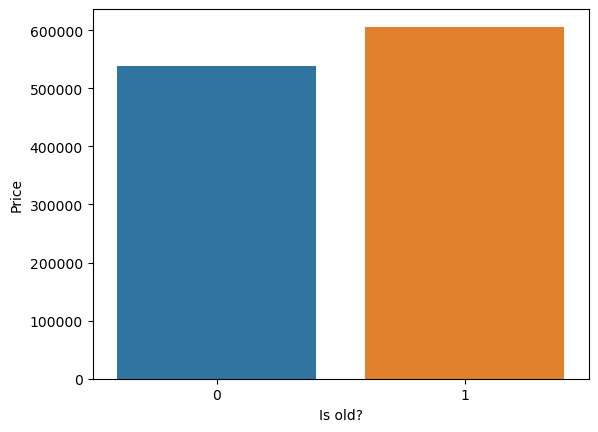

In [11]:
filtered_dataset = dataset[["price", 'yr_built']]

filtered_dataset['is_old'] = 1 

filtered_dataset.loc[filtered_dataset['yr_built'] < 2000, 'is_old' ] = 0 

grouped_dataset = filtered_dataset.groupby('is_old').mean().reset_index()

grouped_dataset = grouped_dataset[['price', 'is_old']]

sb.barplot(grouped_dataset, x="is_old", y="price")

plt.xlabel("Is old?")

plt.ylabel('Price')

plt.show()

De las dos gráficas anterior, se tiene que el precio promedio de las casas construidas en un año menos al 1950 es mayor en promedio a las construidas en años iguales o mayores. Por el contrario, si consideramos el año 2000 como parámetro, en promedio las casas más recientes con más caras que las antiguas. 

Para el caso de la renovación, se construirá otra gráfica.

/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


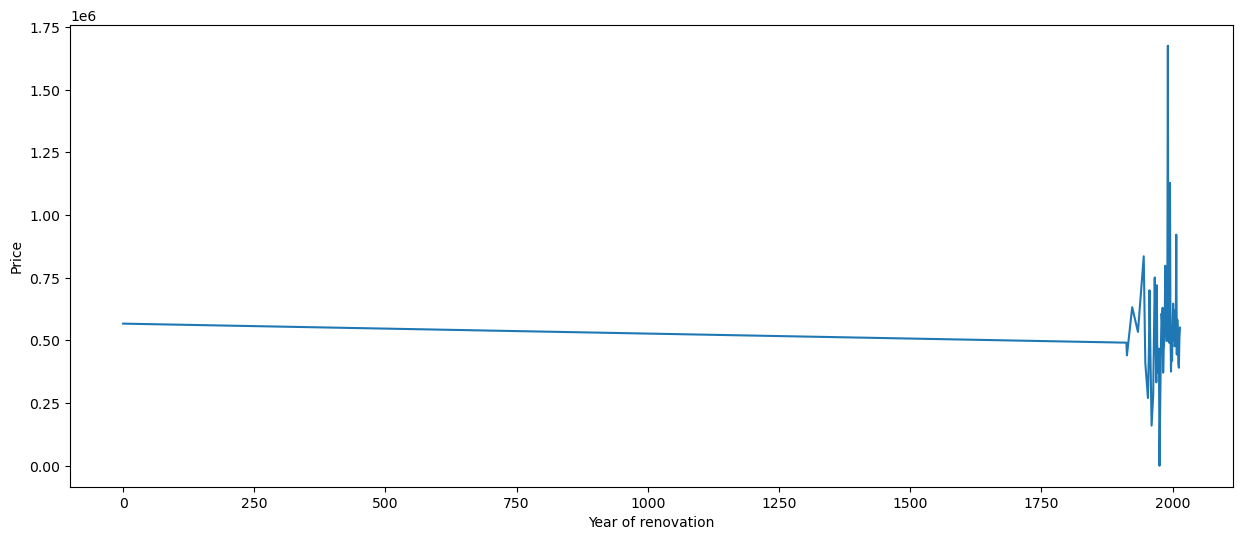

In [12]:
filtered_dataset = dataset[["price", 'yr_renovated']]

filtered_dataset = filtered_dataset.groupby('yr_renovated').mean().reset_index()

filtered_dataset.columns = ['yr_renovated', 'price']

plt.figure(figsize=(15, 6))

sb.lineplot(filtered_dataset, x="yr_renovated", y="price")

plt.xlabel("Year of renovation")

plt.ylabel('Price')

plt.show()

Como se tienen casas con el año de renovación con valor 0, es decir, que nunca se han renovado, pues puede filtrarse al dataset para prescindir de estas observaciones. Además es posible realizar otra verificación con estas casas que nunca han sido renovadas. 

/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aaron/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


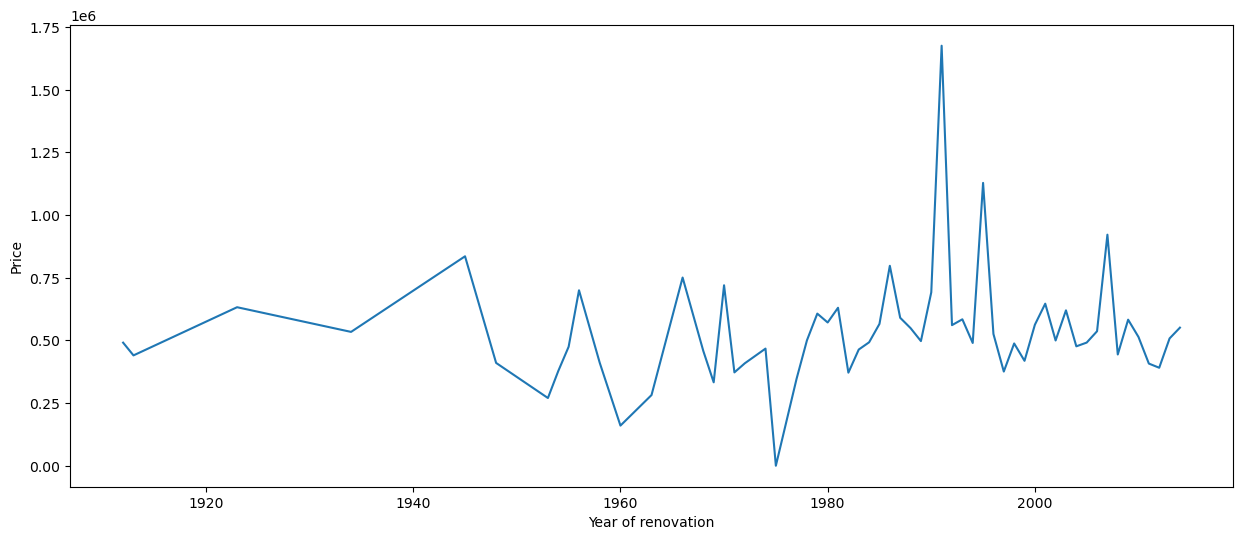

In [13]:
filtered_dataset = dataset[["price", 'yr_renovated']]

filtered_dataset = filtered_dataset.loc[filtered_dataset['yr_renovated'] > 0]

filtered_dataset = filtered_dataset.groupby('yr_renovated').mean().reset_index()

filtered_dataset.columns = ['yr_renovated', 'price']

plt.figure(figsize=(15, 6))

sb.lineplot(filtered_dataset, x="yr_renovated", y="price")

plt.xlabel("Year of renovation")

plt.ylabel('Price')

plt.show()

También se puede comprobar comentado anteriormente sobre el año de construcción acerca de las casas, verificar cuales de estas fueron antiguamente renovadas y cuales no. 

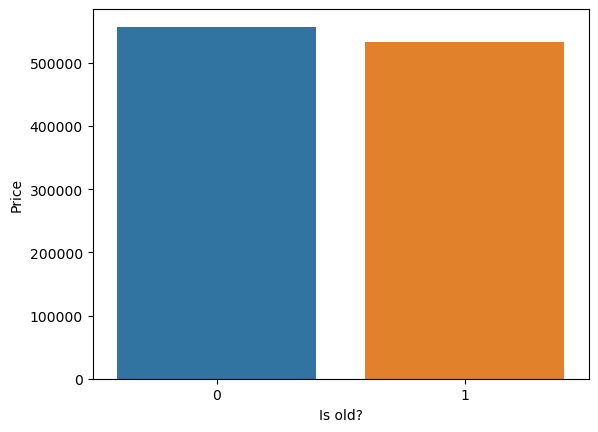

In [14]:
filtered_dataset['is_old'] = 1 

filtered_dataset.loc[filtered_dataset['yr_renovated'] < 1950, 'is_old' ] = 0 

grouped_dataset = filtered_dataset.groupby('is_old').mean().reset_index()

grouped_dataset = grouped_dataset[['price', 'is_old']]

sb.barplot(grouped_dataset, x="is_old", y="price")

plt.xlabel("Is old?")

plt.ylabel('Price')

plt.show()

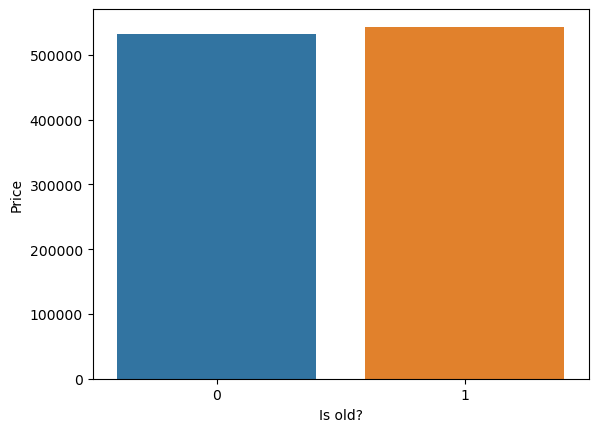

In [15]:
filtered_dataset['is_old'] = 1 

filtered_dataset.loc[filtered_dataset['yr_renovated'] < 2000, 'is_old' ] = 0 

grouped_dataset = filtered_dataset.groupby('is_old').mean().reset_index()

grouped_dataset = grouped_dataset[['price', 'is_old']]

sb.barplot(grouped_dataset, x="is_old", y="price")

plt.xlabel("Is old?")

plt.ylabel('Price')

plt.show()

Similar al caso anterior según la primera gráfica, en promedio, si una casa fue renovada antes del año 1950 debería tener más valor, pero según la segunda gráfica, si la casa fué renovada en el año 2000 o después, esta tendrá un precio mayor.

Otra hecho que sería interesante de comprobar es justamente con base en una de las variables anteriores, el año de renovación. Esto consistirá en saber cual es la cantidad de casas renovadas y no renovadas.

/tmp/ipykernel_44115/4008390859.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['is_renovated'] = 0


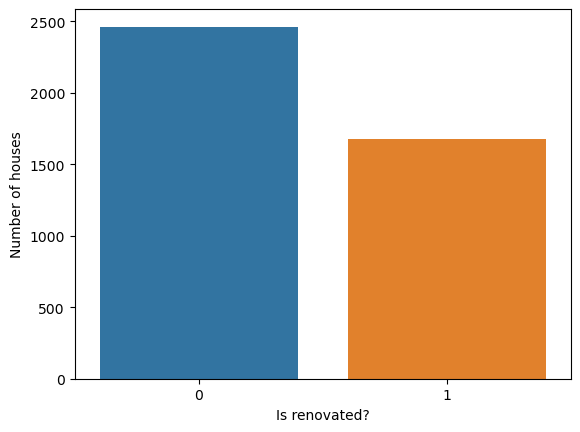

In [16]:
filtered_dataset = dataset[['yr_renovated']]

filtered_dataset['is_renovated'] = 0

filtered_dataset.loc[filtered_dataset['yr_renovated'] > 0, 'is_renovated'] = 1

filtered_dataset = filtered_dataset.groupby('is_renovated').size().reset_index()

filtered_dataset.columns = ['is_renovated', 'Number of houses']

sb.barplot(filtered_dataset, x="is_renovated", y="Number of houses")

plt.xlabel("Is renovated?")

plt.ylabel('Number of houses')

plt.show()


Se puede apreciar, que existe una menor cantidad de casas no renovadas, teniendo una diferencia de alrededor de un tercio.

### ¿El área de la sala realmente influye en el precio?

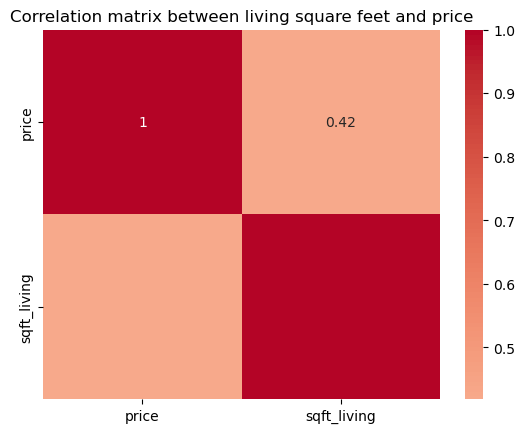

In [17]:
filtered_dataset = dataset[['price', 'sqft_living']] #lot, above, basement

filtered_dataset = filtered_dataset[['price', 'sqft_living']]

sb.heatmap(filtered_dataset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix between living square feet and price')
plt.show()

En el heatmap se observa que existe una relación medianamente buena y positiva (ambas variables crecen al mismo tiempo).

### ¿El área del solar realmente influye en el precio?

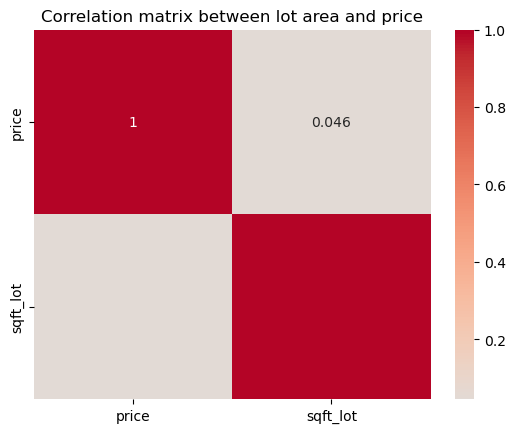

In [18]:
filtered_dataset = dataset[['price', 'sqft_lot']] #lot, above, basement

filtered_dataset = filtered_dataset[['price', 'sqft_lot']]

sb.heatmap(filtered_dataset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix between lot area and price')
plt.show()

Con base en la gráfica, estas dos variables no tienen muchas relación, pues esta es positiva y baja, incluso se pude decir que es nula.

### ¿El área del sótano influye en el precio?

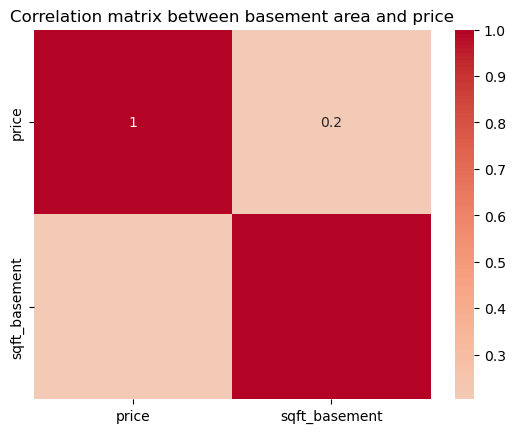

In [19]:
filtered_dataset = dataset[['price', 'sqft_basement']] #lot, above, basement

filtered_dataset = filtered_dataset[['price', 'sqft_basement']]

sb.heatmap(filtered_dataset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix between basement area and price')
plt.show()

En este caso se puede observar una relación bastante débil entre las dos variables.

### ¿El área por encima del sótano influye en el precio?

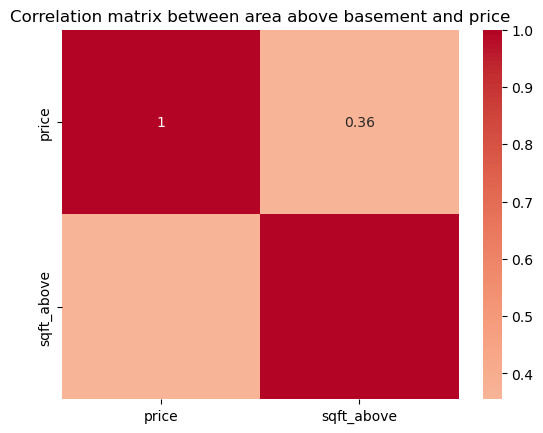

In [20]:
filtered_dataset = dataset[['price', 'sqft_above']] #lot, above, basement

filtered_dataset = filtered_dataset[['price', 'sqft_above']]

sb.heatmap(filtered_dataset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix between area above basement and price')
plt.show()

De esta gráfica se concluye que existe una relación medianamente baja entre el área por encima del sótano y al precio de la casa.

### ¿Si la casa tiene vista al mar aumenta su precio?

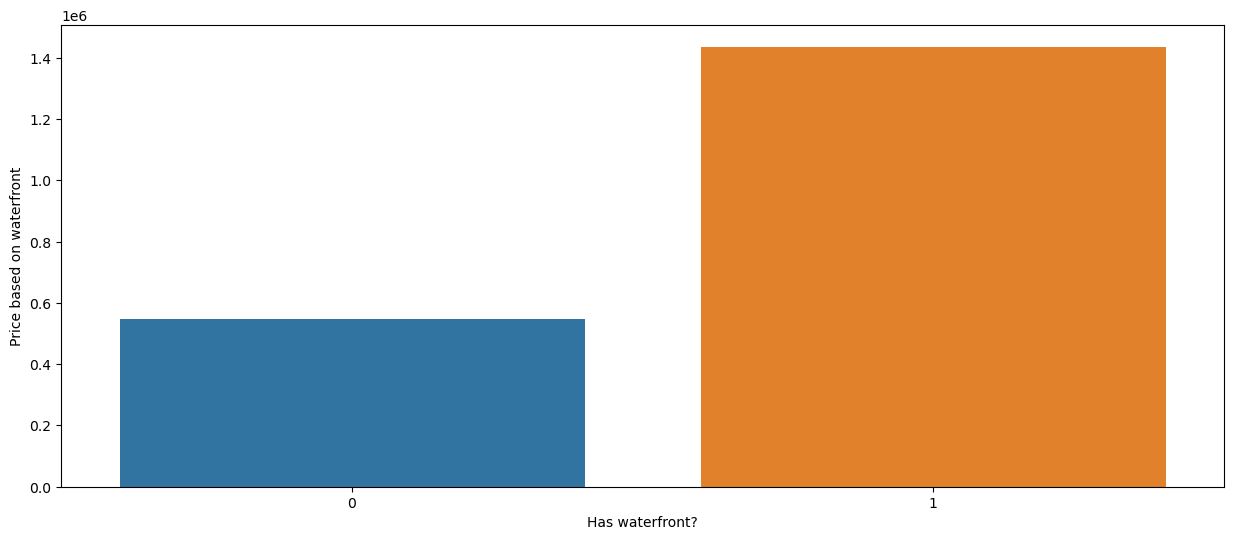

In [21]:
filtered_dataset = dataset[["price", 'waterfront']]

filtered_dataset = filtered_dataset.groupby('waterfront').mean().reset_index()

filtered_dataset.columns = ['waterfront', 'price_based_waterfront']

plt.figure(figsize=(15, 6))

sb.barplot(filtered_dataset, x="waterfront", y="price_based_waterfront")

plt.xlabel('Has waterfront?')

plt.ylabel('Price based on waterfront')

plt.show()

De esta gráfica de barras se puede concluir que efectivamente el hecho de que la casa tenga vista al mar influye bastante en su precio.

### ¿Si la casa tiene una buena vista aumenta su precio?

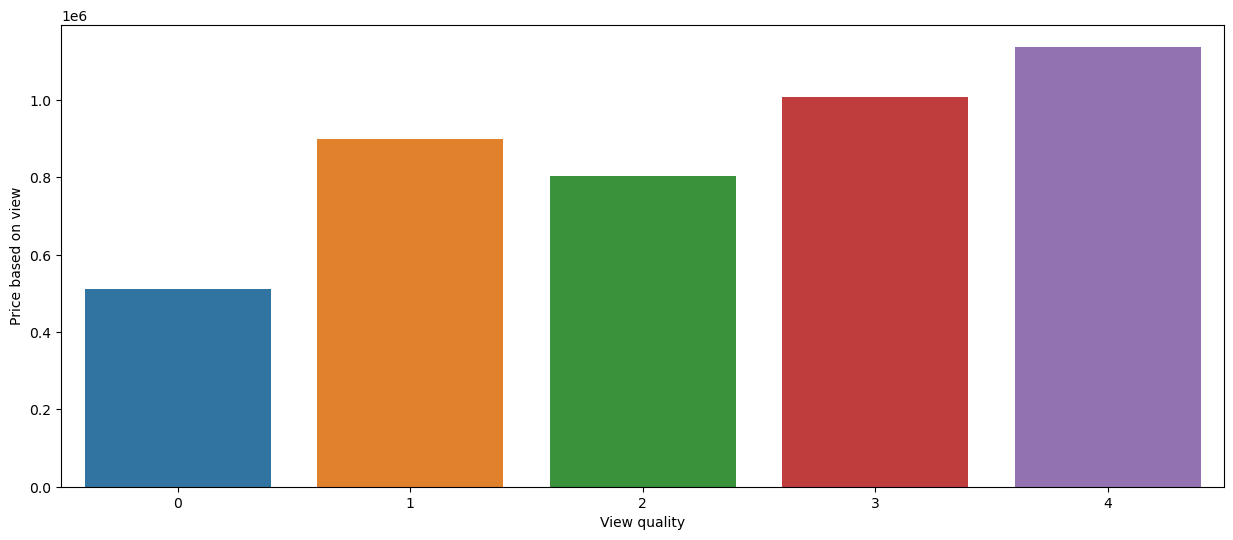

In [22]:
filtered_dataset = dataset[["price", 'view']]

filtered_dataset = filtered_dataset.groupby('view').mean().reset_index()

filtered_dataset.columns = ['waterfront', 'price_based_view']

plt.figure(figsize=(15, 6))

sb.barplot(filtered_dataset, x="waterfront", y="price_based_view")

plt.xlabel('View quality')

plt.ylabel('Price based on view')

plt.show()

A pesar de que si existe ciertas tendencia en la casa de ser más caras con una vista de calidas, esto se cumple en ciertos rangos, pero hay una inconsistencia, pues una casa con una vista de calidad 2 puede costar menos que una de calidad 1, hecho que puede debilitar la relación. Pero si se puede considerar que si existe esta relación de crecimiento simultáneo.

### ¿La condición de la casa realmente influye en el precio?

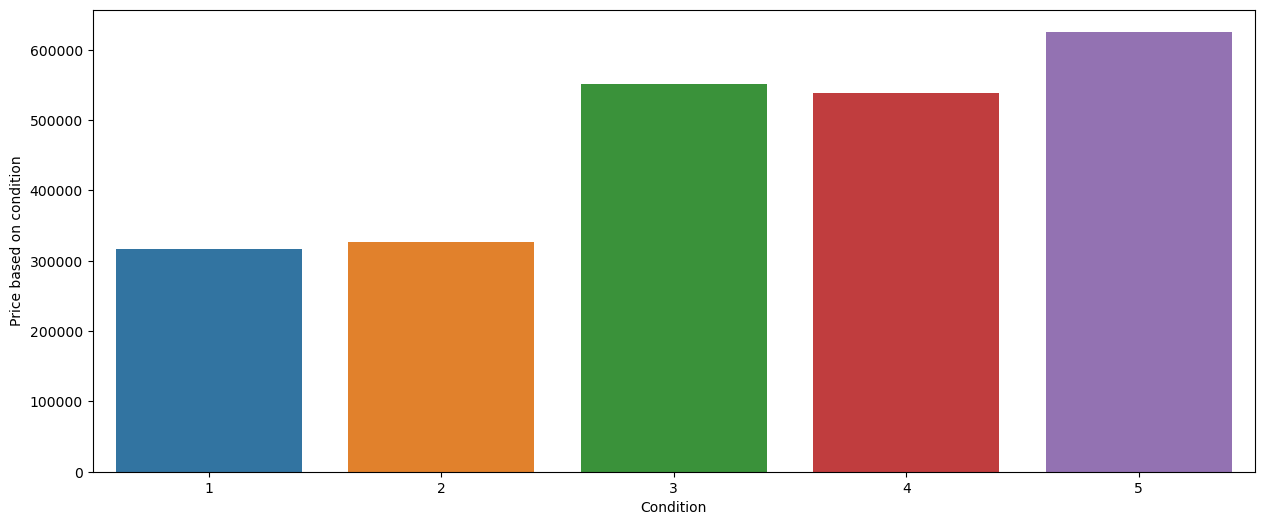

In [23]:
filtered_dataset = dataset[["price", 'condition']]

filtered_dataset = filtered_dataset.groupby('condition').mean().reset_index()

filtered_dataset.columns = ['condition', 'price_based_condition']

plt.figure(figsize=(15, 6))

sb.barplot(filtered_dataset, x="condition", y="price_based_condition")

plt.xlabel('Condition')

plt.ylabel('Price based on condition')

plt.show()

Acá se tiene un caso parecido al anterior, pero se puede decir que si existe cierta relacion notable, a pesar de que esta es debilitada por la inconsistencia que generan las casas con condición 4.

### ¿El tiempo de renovación tiene una relación notable con la ubicación y el precio de la casa?

Finalmente, se plantea la agrupación de casas por zona, junto con un filtro de aquellas casas que hayan sido renovadas. Posteriormente, se aplicaría la diferencia de años entre las variables 'yr_built' (año de construcción) y 'yr_renovated' (año de renovación) para obtener la diferencia y el tiempo en el que se renovó la casa en cuestión. 

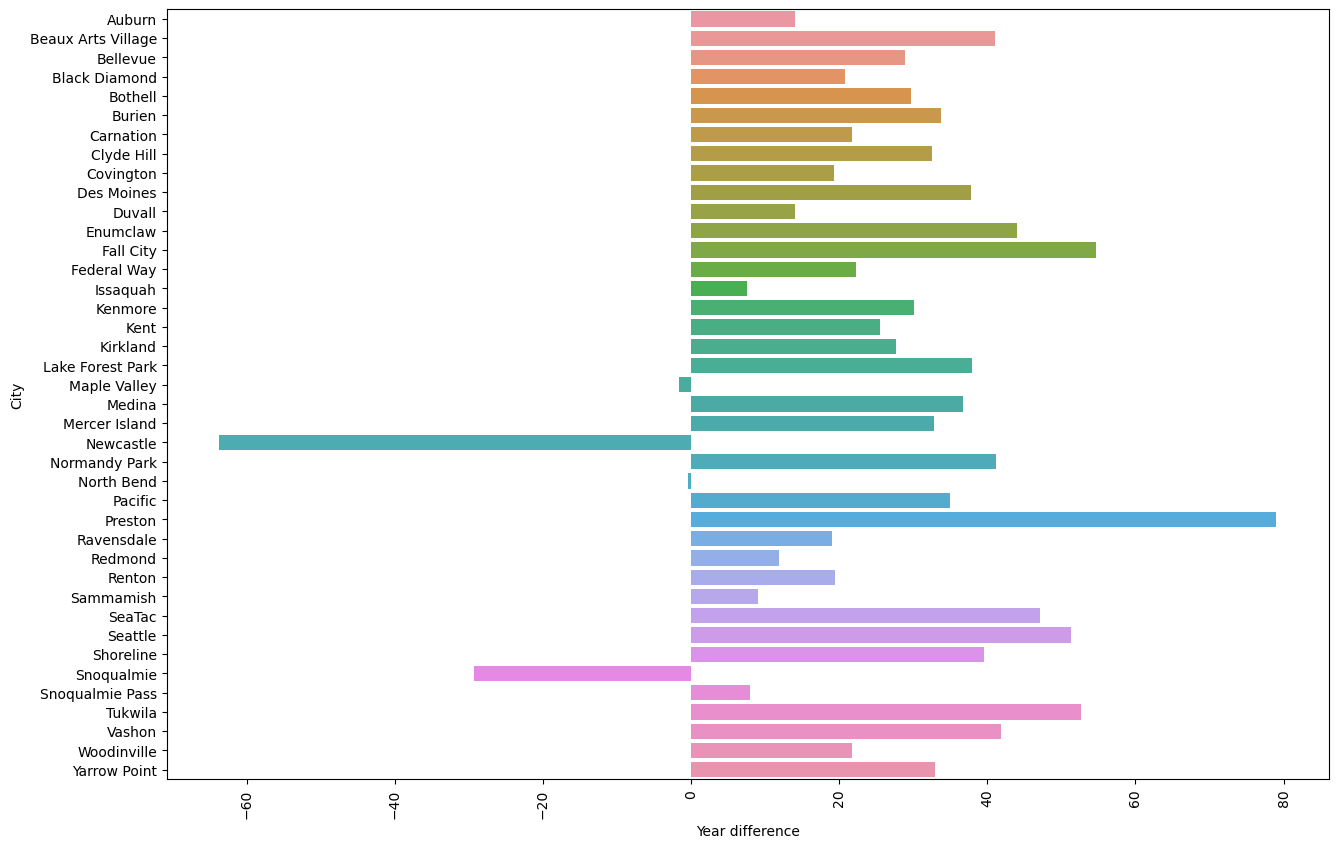

In [24]:
filtered_dataset = dataset[['city', 'yr_built', 'yr_renovated']]

filtered_dataset = filtered_dataset.loc[filtered_dataset['yr_renovated'] > 0]

filtered_dataset['yr_difference'] = filtered_dataset['yr_renovated'] - filtered_dataset['yr_built']

filtered_dataset = filtered_dataset[['city', 'yr_difference']]

filtered_dataset = filtered_dataset.groupby('city').mean().reset_index()

plt.figure(figsize=(15, 10))

plt.xticks(rotation=90)

sb.barplot(filtered_dataset, x="yr_difference", y="city")

plt.xlabel("Year difference")

plt.ylabel('City')

plt.show()


Como existen valores que son negativos, podemos hacer un cambio para que se muestre el valor abosluto (la diferencia de tiempo en si), y considerando, por supuesto que aquellas casas que tienen un valor negativo en esta diferencia es debido a que los valores del año de construcción y renovación están invertido, ya que de forma obvia, es imposible renovar una casa previo a construirla. 

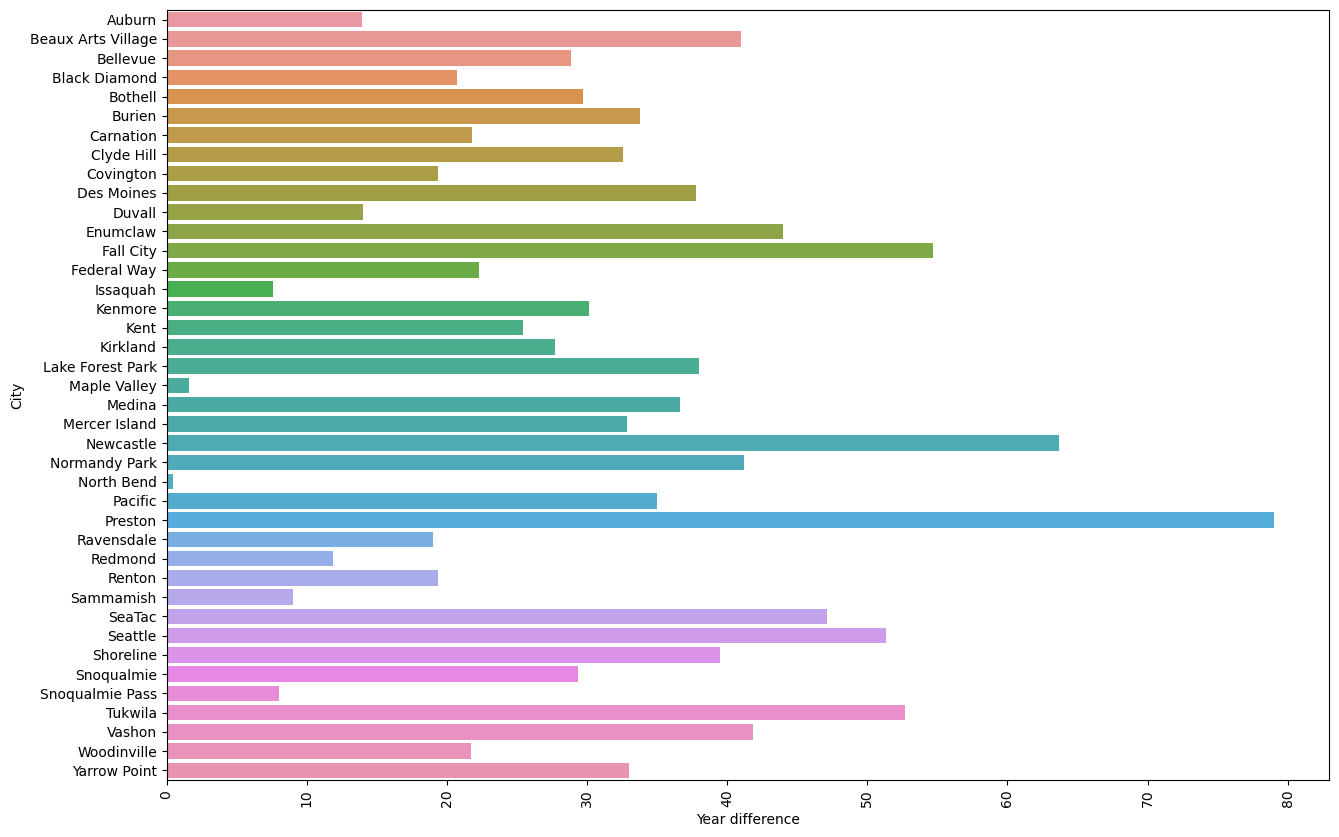

In [25]:
filtered_dataset['yr_difference'] = filtered_dataset['yr_difference'].abs()

plt.figure(figsize=(15, 10))

plt.xticks(rotation=90)

sb.barplot(filtered_dataset, x="yr_difference", y="city")

plt.xlabel("Year difference")

plt.ylabel('City')

plt.show()

De la gráfica, se concluye que si existe una gran tendencia a dejar pasar al menos 8 años entre la construcción y la renovación. Esta observación es importante para saber cuanto se tarda por ciudad en promedio en realizar este proceso. Con base en esto y por una relación transitiva se puede decir que debido a cuanto varía el precio por ciudad, la cantidad de tiempo de renovación no influye de una forma significativa en el precio de las casas, es decir, el precio no será mayor si el tiempo de renovación es menor. Se puede realizar una gráfica directa para esto.   

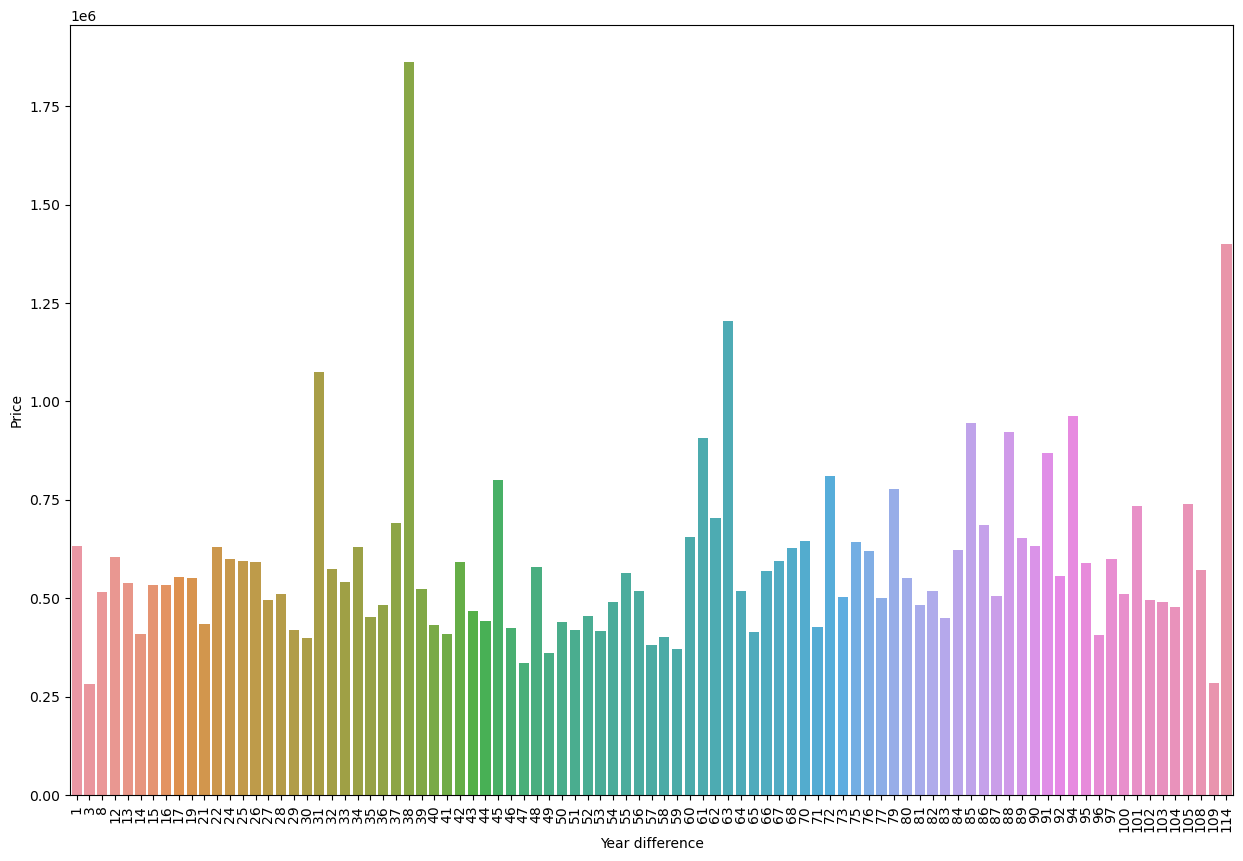

In [26]:
filtered_dataset = dataset[['price', 'yr_built', 'yr_renovated']]

filtered_dataset = filtered_dataset.loc[filtered_dataset['yr_renovated'] > 0]

filtered_dataset['yr_difference'] = filtered_dataset['yr_renovated'] - filtered_dataset['yr_built']

filtered_dataset['yr_difference'] = filtered_dataset['yr_difference'].abs()

filtered_dataset = filtered_dataset.groupby('yr_difference').mean().reset_index()

filtered_dataset = filtered_dataset[['price', 'yr_difference']]

plt.figure(figsize=(15, 10))

plt.xticks(rotation=90)

sb.barplot(filtered_dataset, x="yr_difference", y="price")

plt.xlabel("Year difference")

plt.ylabel('Price')

plt.show()


También puede apreciarse en una matriz de correlación.

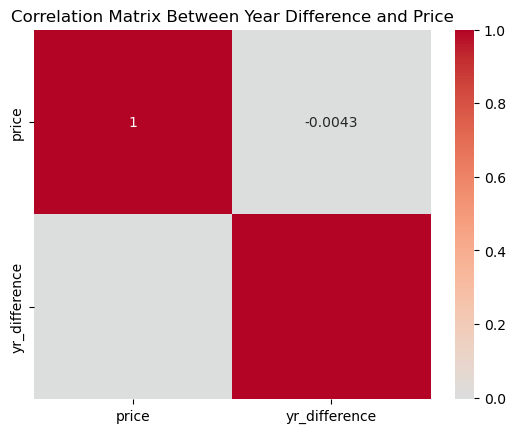

In [27]:
filtered_dataset = dataset[['price', 'yr_built', 'yr_renovated']]

filtered_dataset = filtered_dataset.loc[filtered_dataset['yr_renovated'] > 0]

filtered_dataset['yr_difference'] = filtered_dataset['yr_renovated'] - filtered_dataset['yr_built']

filtered_dataset = filtered_dataset[['price', 'yr_difference']]



sb.heatmap(filtered_dataset.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Between Year Difference and Price')
plt.show()

De estos dos resultados, se concluye que efectivamente existe una relación casi nula (o no existe) entre las cantidad de años hasta la renovación con el precio de las casas.

## Modificiación

En cuanto a los problemas estructurales, se tiene que las variables country, date, street y statezip no son tan relevantes para el ejercicio, pues se sabe de antemano que todas las observaciones son casas en Estados Unidos y que las otras columnas son más información que está contenida en otras columnas o identificadores, como por ejemplo, la fecha o el statezip.

Por parte de los detalles funcionales, se deben acomodar los valores decimales de la variables número de baños. Para esto se usará una clásica aproximación.

In [28]:
del dataset['country']
del dataset['date']
del dataset['street']
del dataset['statezip']

dataset['bathrooms'] = dataset['bathrooms'].round().astype(int)
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.760000e+05,3.0,2,1340,1384,3.0,0,0,3,1340,0,2008,0,Seattle
1,8.000000e+05,4.0,3,3540,159430,2.0,0,0,3,3540,0,2007,0,Carnation
2,2.238888e+06,5.0,6,7270,130017,2.0,0,0,3,6420,850,2010,0,Issaquah
3,3.240000e+05,3.0,2,998,904,2.0,0,0,3,798,200,2007,0,Seattle
4,5.499000e+05,5.0,3,3060,7015,1.0,0,0,5,1600,1460,1979,0,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,2,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4136,5.343333e+05,3.0,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4137,4.169042e+05,3.0,2,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton
4138,2.034000e+05,4.0,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle


Otra modificación posible es la sustitución de variables categóricas por números, con el objetivo de hacer la entrada de datos legible para el modelo de regresión.

In [29]:
le = LabelEncoder()

processed_dataset = dataset

processed_dataset['city'] = le.fit_transform(processed_dataset['city'])

processed_dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.760000e+05,3.0,2,1340,1384,3.0,0,0,3,1340,0,2008,0,34
1,8.000000e+05,4.0,3,3540,159430,2.0,0,0,3,3540,0,2007,0,7
2,2.238888e+06,5.0,6,7270,130017,2.0,0,0,3,6420,850,2010,0,15
3,3.240000e+05,3.0,2,998,904,2.0,0,0,3,798,200,2007,0,34
4,5.499000e+05,5.0,3,3060,7015,1.0,0,0,5,1600,1460,1979,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,2,1510,6360,1.0,0,0,4,1510,0,1954,1979,34
4136,5.343333e+05,3.0,2,1460,7573,2.0,0,0,3,1460,0,1983,2009,3
4137,4.169042e+05,3.0,2,3010,7014,2.0,0,0,3,3010,0,2009,0,31
4138,2.034000e+05,4.0,2,2090,6630,1.0,0,0,3,1070,1020,1974,0,34


Sin más modificaciones destacables, se puede proceder a realizar el modelado.

### Modelado

Se usará un modelo predictivo para saber el precio de casas con características similares a las del dataset. Se realizará una compración entre un entrenamiento con todas las caracteristicas y otra con un entrenamiento con variables filtradas, es decir, variables que tuvieron una relación positiva con al precio de la casa y que además pudiesen genera el menor sesgo posible, tales como la ciudad, vista al mar, calidad de vista, condición general de la casa, tamaño de la sala.

Para este caso, se usará un modelo de regresión lineal, ya que los valores del precio son continuos. También construirán gráfica así como la obtención del error (error medio cuadrado) y al coeficiente r2 que explica la varianza entre los resultados de la predicción y los originales. Cabe destacar que se hará uso del mismo dataset pero realizando un split aleatoria de la data para obtener el subconjunto de entrenamiento y el de pruebas.  

El error medio cuadrado es de: 66853710810.680275
El coeficiente r2 es de: 0.36229859305500134


/tmp/ipykernel_44115/3088306941.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([testing_target.min(), testing_target.max()], [testing_target.min(), testing_target.max()], 'k--', lw=4, color='green')


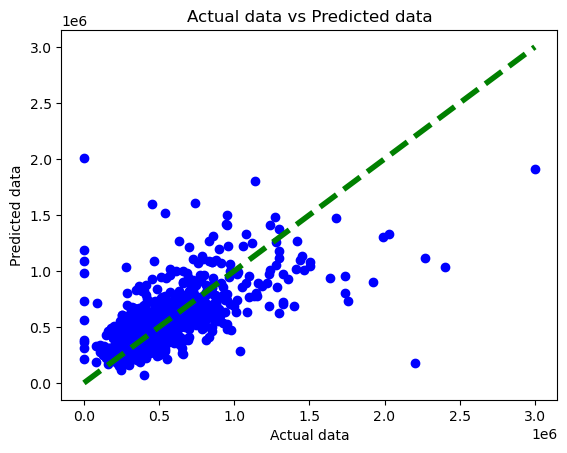

In [30]:
features = processed_dataset[['city', 'view', 'waterfront', 'condition', 'sqft_living', 'yr_built', 'bathrooms', 'bedrooms']]

target = processed_dataset[['price']]

# features = processed_dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city']]

training_features, testing_features, training_target, testing_target = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(training_features, training_target)

predicted_target = model.predict(testing_features)

mse = mean_squared_error(testing_target, predicted_target)
r2 = r2_score(testing_target, predicted_target)

print(f'El error medio cuadrado es de: {mse}')
print(f'El coeficiente r2 es de: {r2}')

plt.scatter(testing_target, predicted_target, color='blue')
plt.plot([testing_target.min(), testing_target.max()], [testing_target.min(), testing_target.max()], 'k--', lw=4, color='green')
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual data vs Predicted data')
plt.show()

El error medio cuadrado es de: 65744610186.5939
El coeficiente r2 es de: 0.37287803613821857


/tmp/ipykernel_44115/1873977932.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([testing_target.min(), testing_target.max()], [testing_target.min(), testing_target.max()], 'k--', lw=4, color='green')


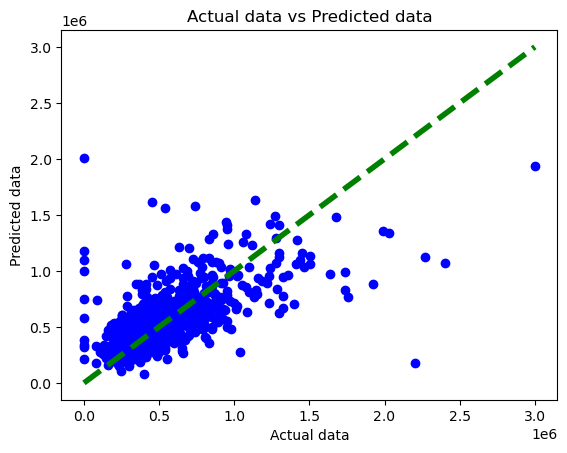

In [31]:
##features = processed_dataset[['city', 'view', 'waterfront', 'condition', 'sqft_living', 'yr_built', 'bathrooms', 'bedrooms']]

target = processed_dataset[['price']]

features = processed_dataset[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city']]

training_features, testing_features, training_target, testing_target = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(training_features, training_target)

predicted_target = model.predict(testing_features)

mse = mean_squared_error(testing_target, predicted_target)
r2 = r2_score(testing_target, predicted_target)

print(f'El error medio cuadrado es de: {mse}')
print(f'El coeficiente r2 es de: {r2}')

plt.scatter(testing_target, predicted_target, color='blue')
plt.plot([testing_target.min(), testing_target.max()], [testing_target.min(), testing_target.max()], 'k--', lw=4, color='green')
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual data vs Predicted data')
plt.show()

## Evaluación

De los resultados anteriores, se tienen:

Para el caso de las variables filtradas: 

- Un error medio cuadrado de 66853710810.680275.
- Un coeficiente r2 de: 0.36229859305500134.

Para el caso de las variables completas:

- Un error medio cuadrado de 65744610186.5939.
- Un coeficiente r2 de: 0.37287803613821857.

Se concluye lo siguente:

- El error en ambos casos es bastante grande, lo que significa que el proceso de predicción no fué muy certero.
- A pesar de lo anterior, se pudo apreciar que la consideración de todas las variables fué más precisa que el subconjunto con variables filtradas.
- Para el caso del coeficiente r2, se considera que explicará mejor la varianza si el coeficiente es de 75% o mayor (0.75). Como se puede observar, en el primer resultado este es de aproximadamente 36% (0.36) y en el segundo de 37% (0.37), lo que implica que en ambos casos el coeficiente no explica de una forma fuerte a la varianza de los resultados. Este es otro indicador de que en general los resultados no fueron tan precisos debido a que no expresa una buena porción de la varianza de los datos.